In [2]:
import pandas as pd
import os

In [4]:
os.chdir("Users/wiley/Documents/Downloads")

In [41]:
table1 = pd.read_csv("Table1.csv", encoding='latin1')
table2 = pd.read_csv("Table2.csv", encoding='latin1')

In [8]:
table1.head()

,formation,collapse,Society_Polity,NaturalGeoArea,quasi_polity,age
0,1748,1826,AfDurrn,Kachi Plain,False,78
1,1193,1206,AfGhurd,Kachi Plain,False,13
2,-248,-130,AfGrBct,Sogdiana,False,118
3,426,563,AfHepht,Sogdiana,False,137
4,496,531,AfHepht,Kachi Plain,False,35


In [9]:
table2.head()

,Society_Polity,State_Formation_low,State_Formation_high,formation,Adulthood_Date,Peak_Power,Collapse_low,Collapse_high,collapse,Approx_age,...,continent,lon1,Capital_2,lat2,lon2,Capital_3,lat3,lon3,violience_attractor,censored
0,Egyptian Dynasties I and II,-3100,NaN,-3100.0,NaN,NaN,-2687.0,NaN,-2687.0,413-413 years,...,Africa,31.250833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Old Egytpian Kingdom,-2650,-2592.0,-2621.0,-2800.0,-2400.0,-2160.0,-2150.0,-2155.0,432-500 years,...,Africa,31.250833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,The Akkadian Empire (Sumer),-2334,NaN,-2334.0,-2310.0,NaN,-2154.0,-2142.0,-2148.0,180-192 years,...,Asia,NaN,Kish,32.540278,44.604722,NaN,NaN,NaN,NaN,False
3,Ur III Dynasty (Neo-Sumerian Empire),-2112,NaN,-2112.0,NaN,NaN,-2004.0,NaN,-2004.0,108-108 years,...,Asia,46.103056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Xia Dynasty,-2070,-1850.0,-1960.0,NaN,-1800.0,-1651.0,-1600.0,-1625.5,199-470 years,...,Asia,113.025131,Yangcheng (modern Gaocheng),34.400600,113.150300,NaN,NaN,NaN,NaN,False


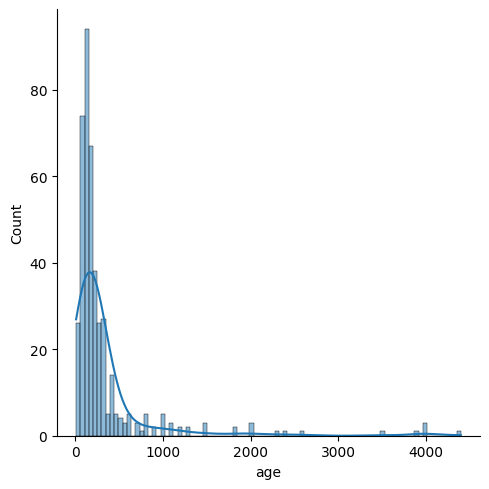

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(table1['age'], kde=True)

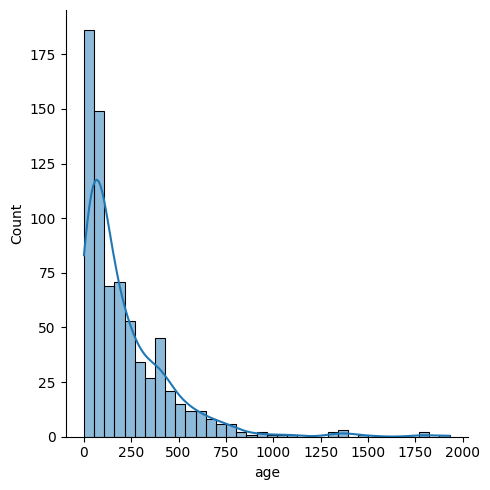

In [19]:
sns.displot(table2['age'], kde=True)

In [20]:
table2.columns.values

array(['Society_Polity', 'State_Formation_low', 'State_Formation_high',
       'formation', 'Adulthood_Date', 'Peak_Power', 'Collapse_low',
       'Collapse_high', 'collapse', 'Approx_age', 'age', 'Political_Type',
       'Political_Sub_Type', 'Region', 'Capital', 'Source',
       'Proximate_Cause', 'Underlying_Cause', 'Collapse_Tra', 'Notes',
       'Relatationship', 'Capital_1', 'lat1', 'continent', 'lon1',
       'Capital_2', 'lat2', 'lon2', 'Capital_3', 'lat3', 'lon3',
       'violience_attractor', 'censored'], dtype=object)

In [42]:
table2['Proximate_Cause'] = table2['Proximate_Cause'].astype(str)
table2['Underlying_Cause'] = table2['Underlying_Cause'].astype(str)
table2['cause'] = table2[['Proximate_Cause', 'Underlying_Cause']].agg(' '.join, axis=1)

In [43]:
table2['cause'] = table2['cause'].str.replace('nan', ' ').str.strip()

In [44]:
import geopandas as gpd
from shapely.geometry import Point
def create_geodataframe(df, lat_col, lon_col):
    geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry)
    return gdf

In [45]:
gdf  = create_geodataframe(table2, 'lat1', 'lon1')

In [47]:
import folium
def create_map(gdf, zoom_start=6):
    # Filter out rows with NaN lat1 or lon1
    gdf_valid = gdf.dropna(subset=['lat1', 'lon1'])
    m = folium.Map(location=[gdf_valid['lat1'].mean(), gdf_valid['lon1'].mean()], zoom_start=zoom_start)
    for _, row in gdf_valid.iterrows():
        folium.CircleMarker(
            location=(row['lat1'], row['lon1']),
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(m)
    return m
m = create_map(gdf)
m